# Sentiment Classification with Natural Language Processing on LSTM 

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dirpath = 'C:/Users/bhumi/Documents/SearchFinalProject/dataset'
review_iter = pd.read_json(dirpath + '/review.json',chunksize = 10000,lines=True)
review_df = pd.DataFrame()
i=0
for df in review_iter:
    if i < 3:
        review_df = pd.concat([review_df, df])
        i += 1
    else:
        break

In [3]:
review_df.shape

(30000, 9)

In [4]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38



# Text Cleaning or Preprocessing

In [5]:
review_data = pd.DataFrame()
label_data = pd.DataFrame()
review_data["text"] = review_df["text"].str.lower().replace('[^\w\s]','')
label_data["label"] = review_df['stars']

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devanshimittal/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
review_list = review_data["text"].tolist()

In [8]:
corpus = []
clean_review = pd.DataFrame()


In [ ]:
corpus = []
for review in review_list:
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus=pd.DataFrame(corpus, columns=['Reviews']) 
corpus.head()

In [ ]:
result=corpus.join(review_df['stars'])
result.head()

# TFIDF

TFIDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). Each word has its respective TF and IDF score. The product of the TF and IDF scores of a word is called the TFIDF weight of that word.

Put simply, the higher the TFIDF score (weight), the rarer the word and vice versa

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(result['Reviews'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [22]:
X = tfidf.transform(result['Reviews'])
result['Reviews'][1]

'actual horrifi place still business. 3 year old son need haircut past summer lure $7 kid cut sign got door. wait minut stylist work people. decor place total garbage. tacky. sofa time pleather sofa giant hole it. son notic ant crawl floor furniture. disgust walk then. actually, turn around walk upon enter didn\'t. older black male stylist finish haircut turn. tell want #2 clipper around back side hand cut top standard boy cut. realli freak simple, right? wrong! rather use clipper go actual cut hair, went down. use move downward cut hair, rub it. man alleg cosmetolog licens know use set freak clippers??? realiz almost immedi idea doing. idea all. 10 minut watch guy stumbl it, said "you know what? that\' fine.", paid left. want get scummi joint take son real haircut place. bottom line: go here. run way!!!!!'

In [23]:
print([X[1, tfidf.vocabulary_['good']]])

[0.0]


In [25]:
print([X[1, tfidf.vocabulary_['old']]])

[0.05424369736260774]


In [27]:
print([X[1, tfidf.vocabulary_['down']]])

[0.06364570577229021]


Among the three words, “peanut”, “jumbo” and “error”, tf-idf gives the highest weight to “jumbo”. Why? This indicates that “jumbo” is a much rarer word than “peanut” and “error”. This is how to use the tf-idf to indicate the importance of words or terms inside a collection of documents.

# Sentiment Classification

In [28]:
result.dropna(inplace=True)
result[result['stars'] != 3]
result['Positivity'] = np.where(result['stars'] > 3, 1, 0)
cols = [ 'stars']
result.drop(cols, axis=1, inplace=True)
result.head()

,Reviews,Positivity
0,"someon work mani museums, eager visit galleri ...",0
1,actual horrifi place still business. 3 year ol...,0
2,love deagan's. do. realli do. atmospher cozi f...,1
3,"dismal, lukewarm, defrosted-tast ""texmex"" glop...",0
4,"oh happi day, final cane near casa. ye other g...",1


In [29]:
result.groupby('Positivity').size()

Positivity
0     9962
1    20038
dtype: int64

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
X = result.Reviews
y = result.Positivity
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [31]:
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),
                                                                             (len(X_train[y_train == 0]) / (len(X_train)*1.))*100,
                                                                            (len(X_train[y_train == 1]) / (len(X_train)*1.))*100))

Train set has total 22500 entries with 33.13% negative, 66.87% positive


In [32]:
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_test),
                                                                             (len(X_test[y_test == 0]) / (len(X_test)*1.))*100,
                                                                            (len(X_test[y_test == 1]) / (len(X_test)*1.))*100))

Test set has total 7500 entries with 33.44% negative, 66.56% positive


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [34]:
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [35]:
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,25001,5000)

def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [37]:
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


Test result for 10000 features


C:\Users\bhumi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score: 81.44%
Test result for 15000 features
accuracy score: 81.75%
Test result for 20000 features
accuracy score: 80.69%
Test result for 25000 features
accuracy score: 80.28%


In [38]:
from sklearn.metrics import classification_report

cv = CountVectorizer(max_features=30000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.72      0.71      0.71      2508
    positive       0.85      0.86      0.86      4992

    accuracy                           0.81      7500
   macro avg       0.79      0.78      0.78      7500
weighted avg       0.81      0.81      0.81      7500



In [39]:
## K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = pipeline, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.81 (+/- 0.02)


# Chi2 Feature Selection

In [40]:
from sklearn.feature_selection import chi2

tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(result.Reviews)
y = result.Positivity
chi2score = chi2(X_tfidf, y)[0]

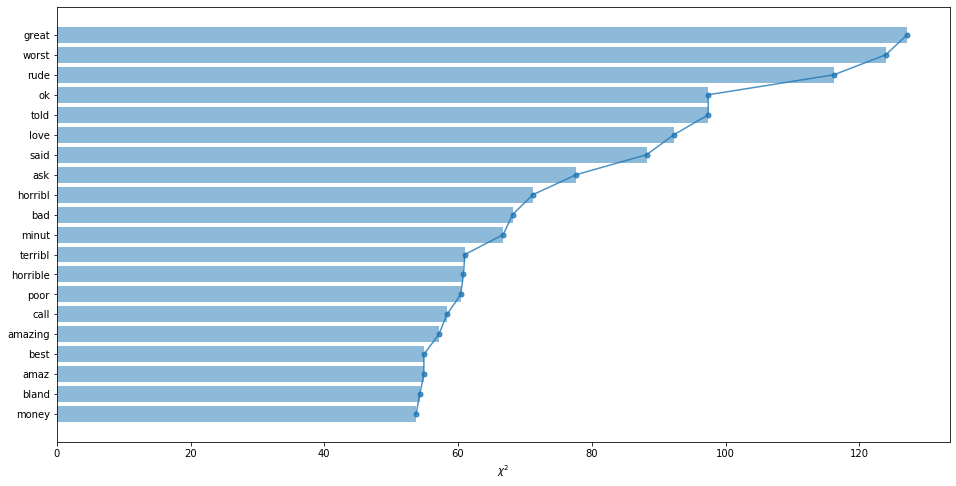

In [41]:
plt.figure(figsize=(16,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();

# LSTM neural network

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

Using TensorFlow backend.


In [43]:
max_fatures = 30000
tokenizer = Tokenizer(nb_words=max_fatures, split=' ')
tokenizer.fit_on_texts(result['Reviews'].values)
X1 = tokenizer.texts_to_sequences(result['Reviews'].values)
X1 = pad_sequences(X1)

C:\Users\bhumi\AppData\Roaming\Python\Python37\site-packages\keras_preprocessing\text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [44]:
Y1 = pd.get_dummies(result['Positivity']).values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, random_state = 42)
print(X1_train.shape,Y1_train.shape)
print(X1_test.shape,Y1_test.shape)

(22500, 630) (22500, 2)
(7500, 630) (7500, 2)


Keras Embedding Layer
Keras offers an Embedding layer that can be used for neural networks on text data.

It requires that the input data be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the Tokenizer API also provided with Keras.

The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.

It is a flexible layer that can be used in a variety of ways, such as:

It can be used alone to learn a word embedding that can be saved and used in another model later.
It can be used as part of a deep learning model where the embedding is learned along with the model itself.
It can be used to load a pre-trained word embedding model, a type of transfer learning.
The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

It must specify 3 arguments:

input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.
For example, below we define an Embedding layer with a vocabulary of 200 (e.g. integer encoded words from 0 to 199, inclusive), a vector space of 32 dimensions in which words will be embedded, and input documents that have 50 words each.


e = Embedding(200, 32, input_length=50)
1
e = Embedding(200, 32, input_length=50)
The Embedding layer has weights that are learned. If you save your model to file, this will include weights for the Embedding layer.

The output of the Embedding layer is a 2D vector with one embedding for each word in the input sequence of words (input document).

If you wish to connect a Dense layer directly to an Embedding layer, you must first flatten the 2D output matrix to a 1D vector using the Flatten layer.

In [45]:
embed_dim = 150
lstm_out = 200

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1], dropout=0.2))
model.add(LSTM(lstm_out, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

C:\Users\bhumi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  """
C:\Users\bhumi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(200, dropout=0.2, recurrent_dropout=0.2)`
  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 630, 150)          4500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               280800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
Total params: 4,781,202
Trainable params: 4,781,202
Non-trainable params: 0
_________________________________________________________________
None


Next, I compose the LSTM Network. Note that embed_dim, lstm_out, batch_size, droupout_x variables are hyperparameters, their values are somehow intuitive, can be and must be played with in order to achieve good results. Please also note that I am using softmax as activation function. The reason is that our Network is using categorical crossentropy, and softmax is just the right activation method for that.

In [ ]:
batch_size = 32
model.fit(X1_train, Y1_train, nb_epoch = 10, batch_size=batch_size, verbose = 2)

C:\Users\bhumi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
C:\Users\bhumi\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
 - 1677s - loss: 0.3838 - accuracy: 0.8340
Epoch 2/10


In [161]:
score,acc = model.evaluate(X1_test, Y1_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.51
acc: 0.84



Finally measuring the number of correct guesses. It is clear that finding negative tweets goes very well for the Network but deciding whether is positive is not really.

In [163]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X1_test)):
    
    result = model.predict(X1_test[x].reshape(1,X1_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y1_test[x]):
        if np.argmax(Y1_test[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y1_test[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

pos_acc 90.67439409905164 %
neg_acc 63.2890365448505 %


## TFIDF + LSTM

## Using only 500 features from the text..

In [13]:
review_df.dropna(inplace=True)
review_df[review_df['stars'] != 3]
review_df['Positivity'] = np.where(review_df['stars'] > 3, 1, 0)
cols = [ 'stars']
review_df.drop(cols, axis=1, inplace=True)
review_df.head()

,review_id,user_id,business_id,useful,funny,cool,text,date,Positivity
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,0
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,1
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,1
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,0


In [14]:
def cleanText(text):
    from bs4 import BeautifulSoup
    import re
    import string
    text = BeautifulSoup(text, "lxml").text
    text = text.replace('\n','')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

In [15]:
full_cleaned = [cleanText(i) for i in review_df['text']]

In [18]:
review_df['text'][0]

'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.'

In [17]:
full_cleaned[0]

'total bill for this horrible service over 8gs these crooks actually had the nerve to charge us 69 for 3 pills i checked online the pills can be had for 19 cents each avoid hospital ers at all costs'

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features = 500)
X_train_counts = count_vect.fit_transform(full_cleaned)



In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)


X_train_tfidf = X_train_tfidf.toarray()
X_train_tfidf = X_train_tfidf.reshape(X_train_tfidf.shape[0], X_train_tfidf.shape[1], 1)
print(X_train_tfidf.shape)

(30000, 500)
(30000, 500, 1)


In [35]:
Y1 = pd.get_dummies(review_df['Positivity'][0:X_train_tfidf.shape[0]]).values
y_lstm = np.array(Y1)


In [38]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np

model = Sequential()
model.add(LSTM(100, input_shape=(X_train_tfidf.shape[1], 1),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(200))
model.add(Dropout(0.2))

model.add(Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 500, 100)          40800     
_________________________________________________________________
dropout_9 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 200)               240800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 402       
Total params: 282,002
Trainable params: 282,002
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
batch_size = 1000
model.fit(X_train_tfidf[0:24000], y_lstm[0:24000], nb_epoch = 5, batch_size=batch_size)

/Users/devanshimittal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/5
24000/24000 [==============================] - 451s 19ms/step - loss: 0.6503 - accuracy: 0.6555
Epoch 2/5
24000/24000 [==============================] - 441s 18ms/step - loss: 0.6389 - accuracy: 0.6641
Epoch 3/5
24000/24000 [==============================] - 389s 16ms/step - loss: 0.6425 - accuracy: 0.6641
Epoch 4/5
24000/24000 [==============================] - 435s 18ms/step - loss: 0.6389 - accuracy: 0.6641
Epoch 5/5
24000/24000 [==============================] - 465s 19ms/step - loss: 0.6387 - accuracy: 0.6641


In [42]:
score,acc = model.evaluate(X_train_tfidf[24000:], y_lstm[24000:], verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.63
acc: 0.67


## Topic Modelling using LDA

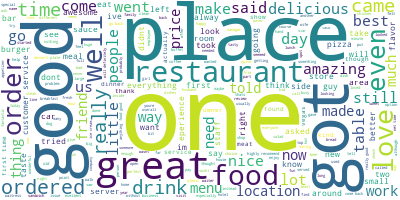

In [46]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(full_cleaned))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

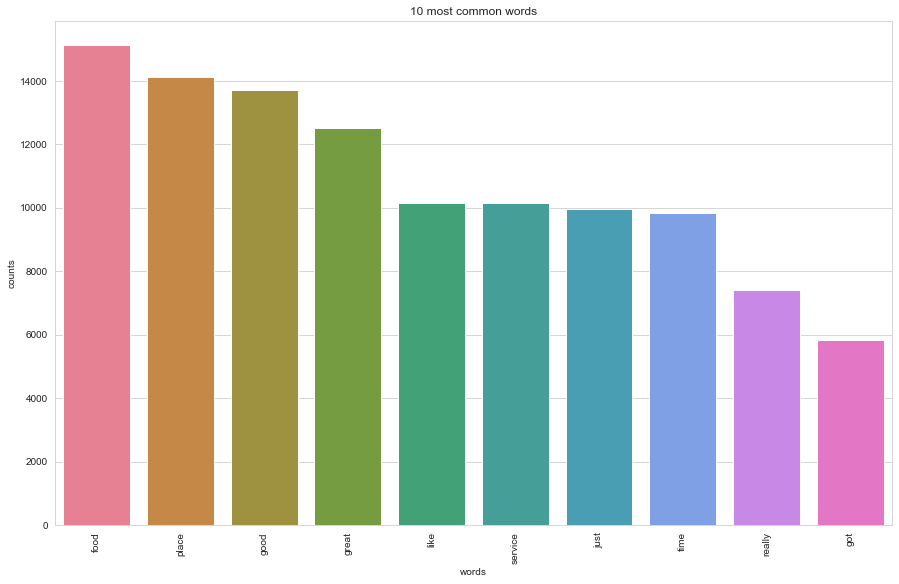

In [47]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(full_cleaned)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [48]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
great place nice staff room love friendly hotel fun store

Topic #1:
good food place great like chicken really just service delicious

Topic #2:
time just service did like great dont got car told

Topic #3:
la et le pour les que pas est au en

Topic #4:
food service good place just time like came order restaurant
